In [7]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.linear_model import LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
%matplotlib inline

# RFE selection after filter method

In [3]:
%store -r X_collinear_Variance_MI #read the features and labels data after filter method
%store -r y

no stored variable #read the features and labels data after filter method


In [4]:
X_collinear_Variance_MI.head()

,TemperatureC,IS_WEEKEND(timestamp),Sea Level PressurehPa / TemperatureC,seasonal_num / TemperatureC,TemperatureC / seasonal_num,Dew PointC * seasonal_num,seasonal_num * TemperatureC,ABSOLUTE(TemperatureC),Humidity * TemperatureC / seasonal_num,Sea Level PressurehPa * seasonal_num / Dew PointC,...,Sea Level PressurehPa / Humidity - seasonal_num * TemperatureC,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,seasonal_num - TemperatureC / Humidity,ABSOLUTE(Dew PointC) - ABSOLUTE(TemperatureC),TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC / Humidity - seasonal_num,Dew PointC * Humidity - Humidity * TemperatureC,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num,ABSOLUTE(Dew PointC) - TemperatureC
0,3.9,False,258.282051,0.256410,3.9,3.9,3.9,3.9,390.0,258.282051,...,6.173000,1003.4,0.961000,0.0,1283.1,-0.961000,0.0,922.684615,1003.4,0.0
1,4.4,False,228.840909,0.227273,4.4,3.3,4.4,4.4,409.2,305.121212,...,6.426882,1002.5,0.952688,-1.1,1491.6,-0.964516,-102.3,929.627273,1002.5,-1.1
2,3.9,False,258.051282,0.256410,3.9,3.9,3.9,3.9,390.0,258.051282,...,6.164000,1002.5,0.961000,0.0,1244.1,-0.961000,0.0,924.348718,1002.5,0.0
3,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5
4,3.3,False,305.000000,0.303030,3.3,2.8,3.3,3.3,320.1,359.464286,...,7.076289,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.530303,1003.2,-0.5


In [5]:
y.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


In [8]:
start = time.time()

rf_r = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rfe = RFECV(estimator=rf_r, step=1, verbose=10, scoring='neg_mean_squared_error', n_jobs=-1) #choose features based on CV
rfe = rfe.fit(X_collinear_Variance_MI, y)

end = time.time()
elapsed = end - start 
print('Time for RFE:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))


Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

In [9]:
print("Optimal number of features : %d" % rfe.n_features_)

Optimal number of features : 12


In [12]:
X_collinear_Variance_MI_RFE = rfe.transform(X_collinear_Variance_MI)
pd.DataFrame(X_collinear_Variance_MI_RFE).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,False,0.392847,6622.62,-3928.46,749.018,749.018,6.173,1003.4,1283.1,0,922.685,1003.4
1,False,0.51224,4836.86,-4430.35,778.059,701.779,6.42688,1002.5,1491.6,-102.3,929.627,1002.5
2,False,0.392496,6616.7,-3924.95,748.349,748.349,6.164,1002.5,1244.1,0,924.349,1002.5
3,False,0.353008,8965.15,-3321.44,701.5,647.036,7.07629,1003.2,1052.7,-48.5,909.53,1003.2
4,False,0.353008,8965.15,-3321.44,701.5,647.036,7.07629,1003.2,1052.7,-48.5,909.53,1003.2


In [23]:
# selected features by RFECV
picked_fea = pd.DataFrame(X_collinear_Variance_MI).columns[rfe.support_]
picked_fea

Index(['IS_WEEKEND(timestamp)',
       'Sea Level PressurehPa / Humidity * TemperatureC / Humidity',
       'Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC',
       'Dew PointC / WindDirDegrees - Sea Level PressurehPa * TemperatureC',
       'Sea Level PressurehPa / seasonal_num - Sea Level PressurehPa / TemperatureC',
       'Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / Dew PointC',
       'Sea Level PressurehPa / Humidity - seasonal_num * TemperatureC',
       'Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num',
       'TemperatureC * WindDirDegrees - TemperatureC / seasonal_num',
       'Dew PointC * Humidity - Humidity * TemperatureC',
       'Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC',
       'Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num'],
      dtype='object')

In [32]:
# transformed features with names
X_collinear_Variance_MI_RFE = pd.DataFrame(X_collinear_Variance_MI_RFE)
X_collinear_Variance_MI_RFE.columns = [picked_fea]
pd.DataFrame(X_collinear_Variance_MI_RFE).head()

,IS_WEEKEND(timestamp),Sea Level PressurehPa / Humidity * TemperatureC / Humidity,Humidity / TemperatureC * Sea Level PressurehPa / TemperatureC,Dew PointC / WindDirDegrees - Sea Level PressurehPa * TemperatureC,Sea Level PressurehPa / seasonal_num - Sea Level PressurehPa / TemperatureC,Sea Level PressurehPa * seasonal_num - Sea Level PressurehPa / Dew PointC,Sea Level PressurehPa / Humidity - seasonal_num * TemperatureC,Sea Level PressurehPa * seasonal_num - TemperatureC / seasonal_num,TemperatureC * WindDirDegrees - TemperatureC / seasonal_num,Dew PointC * Humidity - Humidity * TemperatureC,Sea Level PressurehPa * seasonal_num - WindDirDegrees / TemperatureC,Sea Level PressurehPa / seasonal_num - TemperatureC / seasonal_num
0,False,0.392847,6622.62,-3928.46,749.018,749.018,6.173,1003.4,1283.1,0,922.685,1003.4
1,False,0.51224,4836.86,-4430.35,778.059,701.779,6.42688,1002.5,1491.6,-102.3,929.627,1002.5
2,False,0.392496,6616.7,-3924.95,748.349,748.349,6.164,1002.5,1244.1,0,924.349,1002.5
3,False,0.353008,8965.15,-3321.44,701.5,647.036,7.07629,1003.2,1052.7,-48.5,909.53,1003.2
4,False,0.353008,8965.15,-3321.44,701.5,647.036,7.07629,1003.2,1052.7,-48.5,909.53,1003.2


In [20]:
X_collinear_Variance_MI_RFE_Score = pd.DataFrame({'Feature':list(pd.DataFrame(X_collinear_Variance_MI).columns),
                                      'Ranking':rfe.ranking_})
X_collinear_Variance_MI_RFE_Score.sort_values(by='Ranking').head()

,Feature,Ranking
60,Sea Level PressurehPa / Humidity - seasonal_nu...,1
68,Sea Level PressurehPa / seasonal_num - Tempera...,1
31,Humidity / TemperatureC * Sea Level PressurehP...,1
29,Sea Level PressurehPa / Humidity * Temperature...,1
45,Sea Level PressurehPa / seasonal_num - Sea Lev...,1


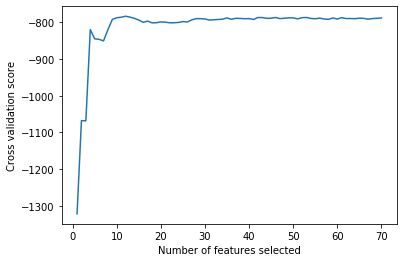

In [21]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()